In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn 

In [2]:
# loading the dataset to a pandas DataFrame
companies = pd.read_csv("C:/Users/aditi/OneDrive/Desktop/data science internship/50_Startups.csv")
# printing the first 5 rows of the dataset
companies.head(5)

,RnDSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [3]:
len(companies)

50

In [4]:
# getting the statistical measures of the data
companies.describe()

,RnDSpend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
# number of rows and Columns in this dataset
print('There are ',companies.shape[0],'rows and ',companies.shape[1],'columns in the dataset.')

There are  50 rows and  4 columns in the dataset.


In [6]:
#using duplicated() pre-defined function
print('There are',companies.duplicated().sum(),'duplicate values in the dateset.') 

There are 0 duplicate values in the dateset.


In [7]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnDSpend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   Profit          50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [8]:
c = companies.corr()
c

,RnDSpend,Administration,MarketingSpend,Profit
RnDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

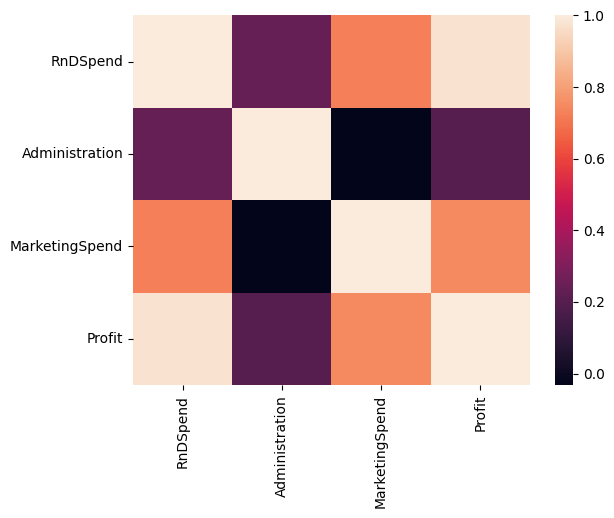

In [9]:
sns.heatmap(companies.corr())

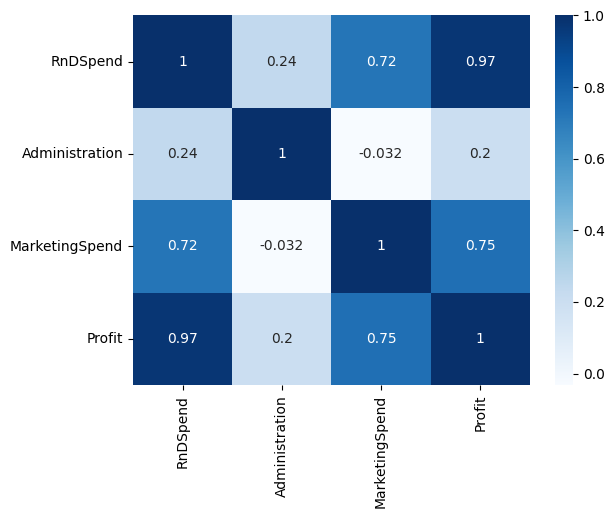

In [10]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

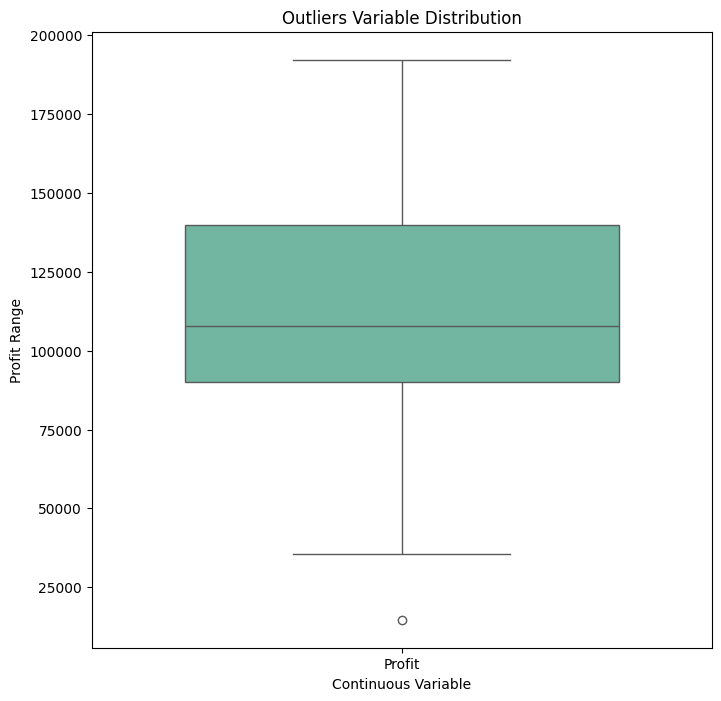

In [11]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=companies[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

C:\Users\aditi\AppData\Local\Temp\ipykernel_20568\1246345763.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(companies['Profit'],bins=5,kde=True)


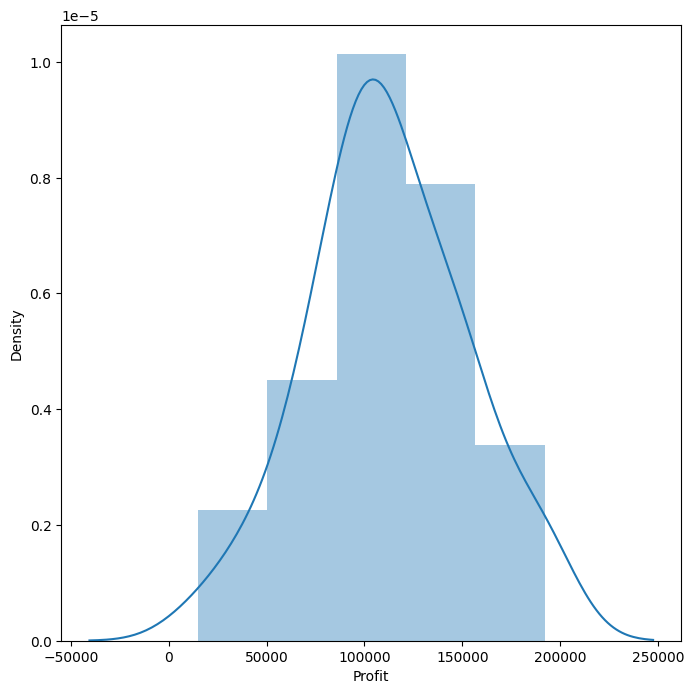

In [12]:
sns.distplot(companies['Profit'],bins=5,kde=True)
plt.show()

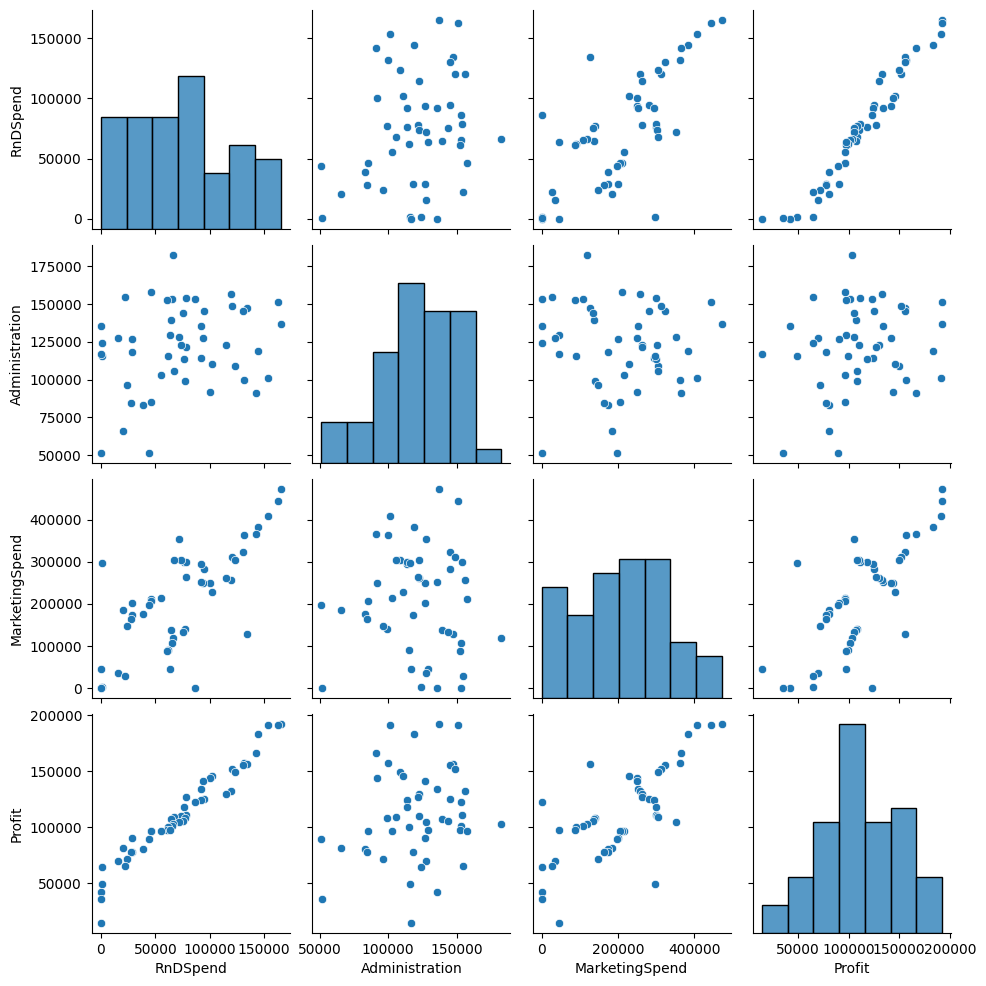

In [13]:
sns.pairplot(companies)
plt.show()

In [14]:
#Select the features and label
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 3].values

In [15]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
#labelencoder = LabelEncoder()
#X[:, 2] = labelencoder.fit_transform(X[:, 2])
#X1 = pd.DataFrame(X)
#X1.head()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(50, 3) (40, 3) (10, 3)


In [20]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 
print('Model has been trained successfully')

Model has been trained successfully


In [21]:
y_predict = regressor.predict(X_test)
y_predict

array([103901.8969696 , 132763.05993126, 133567.90370044,  72911.78976736,
       179627.92567224, 115166.64864795,  67113.5769057 ,  98154.80686776,
       114756.11555221, 169064.01408795])

In [22]:
testing_data_model_score = regressor.score(X_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = regressor.score(X_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9393955917820571
Model Score/Performance on Training data 0.9499572530324031


In [23]:
df = pd.DataFrame(data={'Predicted value':y_predict.flatten(),'Actual Value':y_test.flatten()})
df

,Predicted value,Actual Value
0,103901.896970,103282.38
1,132763.059931,144259.40
2,133567.903700,146121.95
3,72911.789767,77798.83
4,179627.925672,191050.39
5,115166.648648,105008.31
6,67113.576906,81229.06
7,98154.806868,97483.56
8,114756.115552,110352.25
9,169064.014088,166187.94


In [24]:
LRscore = regressor.score(X_test,y_test)
print(LRscore*100,'%')

93.93955917820571 %


In [25]:
#Print the coefficients and y-intercept of the model (function)
print(regressor.coef_)
print(regressor.intercept_)

[0.77884104 0.0293919  0.03471025]
42989.00816508669


In [26]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_test, y_predict)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 93.93955917820571


In [27]:
input_data = (165349.20,136897.80,471784.10)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

[192169.18440985]


In [28]:
import pickle

In [29]:
filename = 'profit_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [30]:
input_data = (165349.20,136897.80,471784.10)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

[192169.18440985]


In [33]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
DTRy_pred = regressor.predict(X_test)
DTRdf = pd.DataFrame({'Predicted profit':DTRy_pred.reshape(-1),'Actual Value':y_test.flatten()})
DTRdf.head()

,Predicted profit,Actual Value
0,101004.64,103282.38
1,141585.52,144259.40
2,141585.52,146121.95
3,78239.91,77798.83
4,182901.99,191050.39


In [35]:
#Accuracy score 
DTscore = regressor.score(X_test,y_test)
print(DTscore*100,'%')

96.12107009064994 %


In [37]:
# Fitting polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
poly_reg.fit(X_train,y_train)
PRypred = regressor.predict(X_test)
PRdata = pd.DataFrame(data={"Predicted Profit": PRypred.flatten(),'Actual Value':y_test.flatten()})
print(PRdata.head())

   Predicted Profit  Actual Value
0         101004.64     103282.38
1         141585.52     144259.40
2         141585.52     146121.95
3          78239.91      77798.83
4         182901.99     191050.39


In [40]:
#implementing Bayesian Ridge model
from sklearn.linear_model import BayesianRidge
bayese = BayesianRidge()
bayese.fit(X_train, y_train)
BRy_pred = bayese.predict(X_test)
BRdf = pd.DataFrame({'Predicted profit':BRy_pred.reshape(-1)})
BRdf.head()

,Predicted profit
0,104004.096309
1,132462.880654
2,133286.131930
3,73072.232932
4,179255.753366


In [42]:
#Accuracy score
BRscore = bayese.score(X_test,y_test)
print(BRscore*100,'%')

93.7544725763598 %


In [45]:
scores = {
    'LinearRegression':LRscore*100,
    'DecisionTreeRegressor': DTscore*100,
    'Bayesian Ridge model': BRscore*100
}

In [46]:
scores

{'LinearRegression': 93.93955917820571,
 'DecisionTreeRegressor': 96.12107009064994,
 'Bayesian Ridge model': 93.7544725763598}

In [48]:
print(f"The Decision Tree Regression has the highest accuracy of {DTscore*100}, Hence this model can be considered for the prediction")

The Decision Tree Regression has the highest accuracy of 96.12107009064994, Hence this model can be considered for the prediction
